In [3]:
!python -V

Python 3.10.9


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

In [125]:
df = pd.read_parquet("../data/yellow_tripdata_2022-01.parquet")

In [126]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [127]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [130]:
# df = df[(df.payment_type==1) & (df.RatecodeID==1)].copy()
#         & (df.RatecodeID==1)]
df = df[(df.VendorID==1)].copy()

In [131]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds()/60)

In [132]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.8,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.00,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.1,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.00,0.3,13.30,0.0,0.0,8.400000
5,1,2022-01-01 00:40:15,2022-01-01 01:09:48,1.0,10.3,1.0,N,138,161,1,33.0,3.0,0.5,13.00,6.55,0.3,56.35,2.5,0.0,29.550000
16,1,2022-01-01 00:33:52,2022-01-01 00:47:28,3.0,4.2,1.0,N,148,141,1,14.0,2.5,0.5,3.45,0.00,0.3,20.75,2.5,0.0,13.600000
17,1,2022-01-01 00:53:54,2022-01-01 01:05:20,2.0,2.2,1.0,N,237,107,1,9.5,2.5,0.5,2.55,0.00,0.3,15.35,2.5,0.0,11.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463871,1,2022-01-31 23:25:54,2022-01-31 23:41:23,NaN,3.2,NaN,None,186,141,0,13.0,0.5,0.5,2.52,0.00,0.3,19.32,NaN,NaN,15.483333
2463887,1,2022-01-31 23:19:43,2022-01-31 23:26:12,NaN,1.5,NaN,None,48,68,0,7.0,0.5,0.5,1.62,0.00,0.3,12.42,NaN,NaN,6.483333
2463907,1,2022-01-31 23:24:35,2022-01-31 23:38:41,NaN,3.5,NaN,None,113,65,0,13.5,0.5,0.5,2.60,0.00,0.3,19.90,NaN,NaN,14.100000
2463908,1,2022-01-31 23:33:18,2022-01-31 23:39:39,NaN,0.9,NaN,None,79,148,0,6.0,0.5,0.5,0.98,0.00,0.3,10.78,NaN,NaN,6.350000


/tmp/ipykernel_1945/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

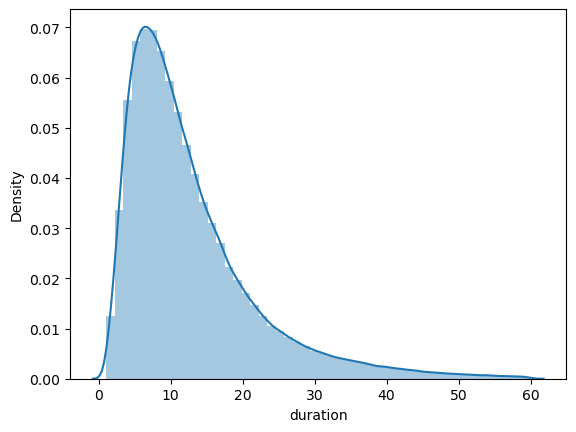

In [149]:
sns.distplot(df.duration)

In [83]:
df.duration.describe().round(2)

count    1874874.00
mean          14.04
std           43.67
min            0.00
25%            6.45
50%           10.20
75%           16.02
max         1439.92
Name: duration, dtype: float64

In [84]:
((df.duration >= 1) & (df.duration <= 60 )).mean()

0.9896665055891756

In [17]:
td = df.duration.iloc[0]

In [18]:
td

17.816666666666666

In [19]:
td.total_seconds()/60

AttributeError: 'numpy.float64' object has no attribute 'total_seconds'

In [ ]:
l1 = ["eat", "sleep", "repeat"]
s1 = "geek"
  
# creating enumerate objects
obj1 = enumerate(l1)
obj2 = enumerate(s1)
  
print ("Return type:", type(obj1))
print (list(enumerate(l1)))
  
# changing start index to 2 from 0
print (list(enumerate(s1, 2)))

In [133]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99]).round()

count    742273.0
mean         13.0
std          11.0
min       -3442.0
50%          10.0
95%          32.0
98%          43.0
99%          51.0
max         914.0
Name: duration, dtype: float64

In [36]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [134]:
df= df[(df.duration >= 1) & (df.duration <= 60 )].copy()

In [150]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [136]:
df[categorical] = df[categorical].astype(str)

In [137]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.8,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.00,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.1,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.00,0.3,13.30,0.0,0.0,8.400000
5,1,2022-01-01 00:40:15,2022-01-01 01:09:48,1.0,10.3,1.0,N,138,161,1,33.0,3.0,0.5,13.00,6.55,0.3,56.35,2.5,0.0,29.550000
16,1,2022-01-01 00:33:52,2022-01-01 00:47:28,3.0,4.2,1.0,N,148,141,1,14.0,2.5,0.5,3.45,0.00,0.3,20.75,2.5,0.0,13.600000
17,1,2022-01-01 00:53:54,2022-01-01 01:05:20,2.0,2.2,1.0,N,237,107,1,9.5,2.5,0.5,2.55,0.00,0.3,15.35,2.5,0.0,11.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463871,1,2022-01-31 23:25:54,2022-01-31 23:41:23,NaN,3.2,NaN,None,186,141,0,13.0,0.5,0.5,2.52,0.00,0.3,19.32,NaN,NaN,15.483333
2463887,1,2022-01-31 23:19:43,2022-01-31 23:26:12,NaN,1.5,NaN,None,48,68,0,7.0,0.5,0.5,1.62,0.00,0.3,12.42,NaN,NaN,6.483333
2463907,1,2022-01-31 23:24:35,2022-01-31 23:38:41,NaN,3.5,NaN,None,113,65,0,13.5,0.5,0.5,2.60,0.00,0.3,19.90,NaN,NaN,14.100000
2463908,1,2022-01-31 23:33:18,2022-01-31 23:39:39,NaN,0.9,NaN,None,79,148,0,6.0,0.5,0.5,0.98,0.00,0.3,10.78,NaN,NaN,6.350000


In [138]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [139]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [140]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [141]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

In [142]:
target = 'duration'

In [143]:
y_train=df[target].values

In [144]:
y_train

array([17.81666667,  8.4       , 29.55      , ..., 14.1       ,
        6.35      , 17.75      ])

In [145]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [146]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_1945/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_1945/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


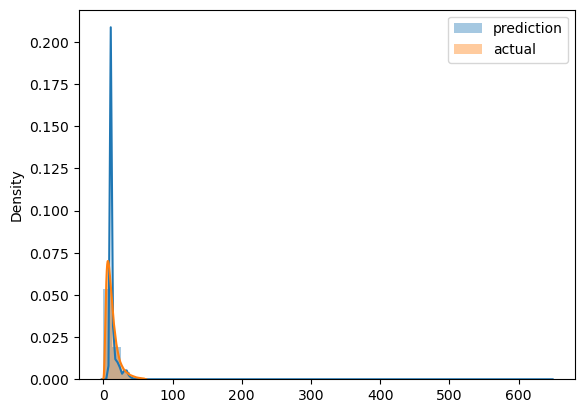

In [147]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [148]:
mean_squared_error(y_train, y_pred, squared=False)

6.398288123784074